In [1]:
import torch

In [2]:
torch.__version__

'1.8.1+cu102'

Pytorch

- NumPy와 유사하지만 GPU 상에서 실행 가능한 N차원 Tensor

- 신경망을 구성하고 학습하는 과정에서 자동 미분

- 신경망을 생성하고 학습시키기 위해 torch.nn, torch.optim, Dataset, DataLoader 등의 모듈과 클래스를 제공함


__PyTorch Tensor__는 GPU를 활용하여 수치 연산을 가속화할 수 있다. GPU에서 PyTorch Tensor를 사용하기 위해서는 자료형 변환을 수행하면됨


__torch.autograd__를 사용하여 신경망에서 역전파 단계의 연산을 자동화함

__torch.nn 모듈__은 신경망 구축하기위한 다양한 데이터 구조나 계층을 정의하고 있음
__optim 모듈__은 최적화 알고리즘을 구현하고 있음

__torch.utils.data 모듈__은 SGD의 반복 연산을 위한 미니 배치 데이터 유틸리티 함수


In [4]:
x = torch.Tensor([1,2,3])
x

tensor([1., 2., 3.])

In [5]:
print("dimension:",x.dim())
print("shape:", x.shape)
print("size:", x.size())

dimension: 1
shape: torch.Size([3])
size: torch.Size([3])


# 인덱스, 슬라이싱

In [6]:
print(x[0],x[1], x[-1])

tensor(1.) tensor(2.) tensor(3.)


In [7]:
print(x[0:1], x[0:2])

tensor([1.]) tensor([1., 2.])


In [8]:
x.shape

torch.Size([3])

#  사칙연산

In [9]:
x + torch.Tensor([2,2,2])

tensor([3., 4., 5.])

In [10]:
x + 5

tensor([6., 7., 8.])

In [11]:
x - 5

tensor([-4., -3., -2.])

In [12]:
x * 5

tensor([ 5., 10., 15.])

In [13]:
x / 5

tensor([0.2000, 0.4000, 0.6000])

#  2차원 행렬

In [14]:
x = torch.Tensor([[1,2,3], [4,5,6]])
x

tensor([[1., 2., 3.],
        [4., 5., 6.]])

In [15]:
print("dimension:",x.dim())
print("shape:", x.shape)
print("size:", x.size())

dimension: 2
shape: torch.Size([2, 3])
size: torch.Size([2, 3])


In [16]:
x[0,1]

tensor(2.)

In [17]:
x + 5

tensor([[ 6.,  7.,  8.],
        [ 9., 10., 11.]])

In [18]:
x = torch.randn((2,5))
x

tensor([[-0.4701, -0.4127,  1.3669, -0.3670,  0.8240],
        [ 0.6500, -0.4337,  0.0027, -1.1248,  0.1089]])

In [19]:
x = torch.Tensor([[1, 2], [3, 4]])
x

tensor([[1., 2.],
        [3., 4.]])

# 다양한 함수

In [20]:
print(x.sum()) # 단순히 원소 전체의 덧셈을 수행
print(x.sum(dim=0)) # 열을 기준으로 덧셈
print(x.sum(dim=1)) # 행을 기준으로 덧셈

tensor(10.)
tensor([4., 6.])
tensor([3., 7.])


In [21]:
print(x.mean()) # 단순히 원소 전체의 평균 수행
print(x.mean(dim=0)) # 열을 기준으로 평균
print(x.mean(dim=1)) # 행을 기준으로 평균

tensor(2.5000)
tensor([2., 3.])
tensor([1.5000, 3.5000])


Max: 원소의 최대값을 리턴
ArgMax: 최대값을 가진 인덱스를 리턴

In [22]:
print('Max: ', x.max(dim=0)[0])
print('Argmax: ', x.max(dim=0)[1])

Max:  tensor([3., 4.])
Argmax:  tensor([1, 1])


# Pytorch로 뉴런을 하나 만들어 봅시다.

https://towardsdatascience.com/under-the-hood-of-deep-learning-e8bb39aec5d2

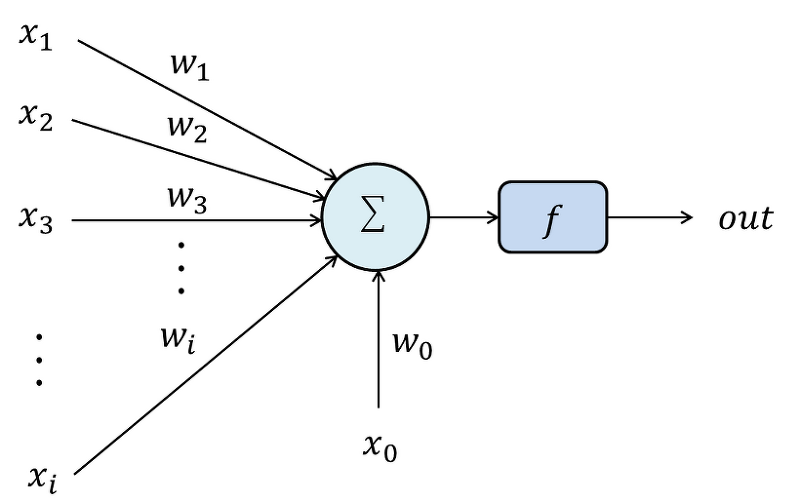

In [23]:
from IPython.display import Image
Image("./img/img1.png")

In [24]:
input_img = torch.randn((1,10))
input_img

tensor([[-0.2098, -0.6526, -0.0466, -0.2062, -0.4487, -1.4759,  0.0203,  0.0056,
         -0.2410, -1.3736]])

In [25]:
weights = torch.randn_like(input_img)
weights

tensor([[ 1.0544, -2.2222, -1.1495, -0.5104, -0.6196,  0.3591, -1.6357, -1.4145,
         -0.0335,  0.4339]])

In [26]:
bias = torch.randn((1,1))
bias

tensor([[0.5889]])

In [27]:
output = torch.sum(input_img * weights) + bias

In [28]:
def sigmoid (x):
    return 1/(1+torch.exp(-x))

In [29]:
activation= sigmoid(output)
activation

tensor([[0.7494]])

In [30]:
output = torch.mm(input_img, weights) + bias

RuntimeError: mat1 and mat2 shapes cannot be multiplied (1x10 and 1x10)

matmul는 벡터 두개를 내적하는 함수이고, 앞서 이론시간에 설명한 것처럼 (1*10) (1*10) 벡터 두개를 내적할 수 없고 하나를 Transpose해줘야한다.
이를 가능하게 하는 함수는 여러가지가 있다.
1. resize
2. reshape
3. view
4. torch.transpose

In [31]:
output = torch.mm(input_img, weights.transpose(0,1)) + bias
output

tensor([[1.0956]])

In [32]:
output = torch.mm(input_img, weights.resize(10,1)) + bias
output

/home/dilab/anaconda3/envs/pysyft2/lib/python3.9/site-packages/torch/tensor.py:474: UserWarning: non-inplace resize is deprecated
  warnings.warn("non-inplace resize is deprecated")


tensor([[1.0956]])

In [33]:
output = torch.mm(input_img, weights.reshape(10,1)) + bias
output

tensor([[1.0956]])

In [34]:
output = torch.mm(input_img, weights.view(10,1)) + bias
output

tensor([[1.0956]])

# 두개의 뉴런

In [35]:
input_img = torch.randn((1,3))

In [36]:
n_inputs = input_img.shape[1] #3
n_neurons = 2
n_ouputs = 1

In [37]:
W1 = torch.randn((n_inputs, n_neurons)) #3*2
W2 = torch.randn((n_neurons, n_ouputs)) #2*1

In [38]:
B1 = torch.randn((1, n_neurons)) #1*2
B2 = torch.randn((1, n_ouputs)) # 1*1

In [39]:
h1 = sigmoid(torch.mm(input_img, W1) + B1)  # (1*3) * (3*2)   (1*2)
output = sigmoid(torch.mm(h1, W2) + B2)  # (1*2) (2*1) = (1*1)

In [40]:
output

tensor([[0.7315]])

# Autograd

In [41]:
x = torch.ones((1), requires_grad=True)
print(x)
y = x + 2
print(y)
print("===== Run backward =====")
y.backward()
print(y)

tensor([1.], requires_grad=True)
tensor([3.], grad_fn=<AddBackward0>)
===== Run backward =====
tensor([3.], grad_fn=<AddBackward0>)


In [42]:
x.grad #기울기

tensor([1.])

In [43]:
x = torch.randn((2,2), requires_grad=True)
x

tensor([[ 0.9220,  0.0198],
        [ 1.6901, -1.2091]], requires_grad=True)

In [44]:
y = x + 2
y

tensor([[2.9220, 2.0198],
        [3.6901, 0.7909]], grad_fn=<AddBackward0>)

In [45]:
z = y * y * 3
z

tensor([[25.6145, 12.2384],
        [40.8497,  1.8765]], grad_fn=<MulBackward0>)

In [46]:
out = z.mean()
out

tensor(20.1448, grad_fn=<MeanBackward0>)

In [47]:
x.grad

In [48]:
out.backward()

In [49]:
x.grad

tensor([[4.3830, 3.0297],
        [5.5351, 1.1863]])

# chain rule 계산

out  = $\frac{1}{4}\sum_{i=4}^{4}{z_i}$ 이고, $z_i=3(x_i+2)^2$이고, $z_{x=1}$일때, 27이다.
여기서 그라디언트의 chain rule을 사용해보면 $\frac{ \displaystyle \Delta Out}{\displaystyle \Delta x_i}= \frac{\displaystyle \Delta Out}{\displaystyle \Delta z_i} \cdot \frac{\displaystyle \Delta z_i}{\displaystyle \Delta x_i} $로 구할 수 있다.

여기서 $\frac{\displaystyle \Delta Out}{\displaystyle \Delta z_i}$의 값은 $\frac{1}{4}$이며, $\frac{\displaystyle \Delta z_i}{\displaystyle \Delta x_i}$는 $6(x_i+2)$ 이며, 두개를 곱하면 $\frac{3}{2}(x_i+2)$로 표현된다.


In [50]:
(3/2)*(x+2)

tensor([[4.3830, 3.0297],
        [5.5351, 1.1863]], grad_fn=<MulBackward0>)